# RGB IMAGE COMPRESSION WITH DCT

-----------

### Artash Nath, Pay-Elec Team, UTAT

----------------

In [1]:
# Importing Required Libararies

from scipy.fftpack import dct, idct # To perform DCT And Inverse DCT
from skimage.io import imread # Read Image File
import numpy as np # Numpy to perform mathematical operations on images/arrays
import matplotlib.pylab as plt # Plot results and display images

In [2]:
# Calculates multidimension Discrete Cosine Transformation on an image
def dct2(a):
    return dct(dct(a.T, norm='ortho').T, norm='ortho') #Converts an array into an array of DCT Coefficients of same shape

# Calculates Inverse Diicrete Cosine Transformation on an image
def idct2(a):
    return idct(idct(a.T, norm='ortho').T, norm='ortho') # Reverses an array of DCT Coefficients back into an image

In [3]:
# Calculate (%) simmilarity between 2 arrays of same size

def image_simmilarity(imageA, imageB):
    
    diff = abs(imageA - imageB) # Find difference between 2 images
    
    err = diff.mean() # Calculate Average Difference between those 2 images
    
    return err

In [4]:

# Function that takes an image, converts it into DCT Coefficients. Keeping only percentage "thresh" of coefficients
# And reversing kept coefficients back into image

def DCTrecreate(im, thresh, display = False):
    
    DCT =  dct2(im) # Calculates and Creates an array of DCT Coefficients equal to the size of the original image
    thresh2 = np.sort(abs((DCT.ravel())))[int(DCT.size*(1-thresh))] # Determines lowest DCT Coeff values to keep based on "thresh"
    dct_thresh = DCT * (abs(DCT) > (thresh2)) # Removes all DCT Vales lower then determines threshold from DCT Coeff. Array
    P = round((np.sum(abs(DCT) > (thresh2))/im.size)*100, 2) # Re-Calculates threshold of pixels discarded for verification
    r_im = idct2(dct_thresh) # Reverses array of kept DCT Coeffs. Back into a reconstructed image
    r_im =r_im.astype(np.uint8)
    simm = image_simmilarity(im, r_im)
    #Display Orginal VS Recreated Image if Display==True
    if display == True:
        fig, axs = plt.subplots(1, 2, figsize = (16,8))
        axs[0].imshow(im)
        axs[0].axis('on')
        axs[0].set_title("Original Image")

        axs[1].imshow(r_im)
        axs[1].axis('off')
        title = "Reconsturcted Image ("+str(P)+"% Coefficients) "+ "| Simmilarity : "+str(int(simm))
        axs[1].set_title(title)
        plt.show()
        
    #Return recreated image array
    
    
    else:
        return r_im, simm

In [5]:
im = imread('rocket.jpg') # Read Sample Image

In [6]:
reconstructed, simmilarity = DCTrecreate(im, 1, display=False) # Reconstructing image with 0% loss in DCT Coefficients

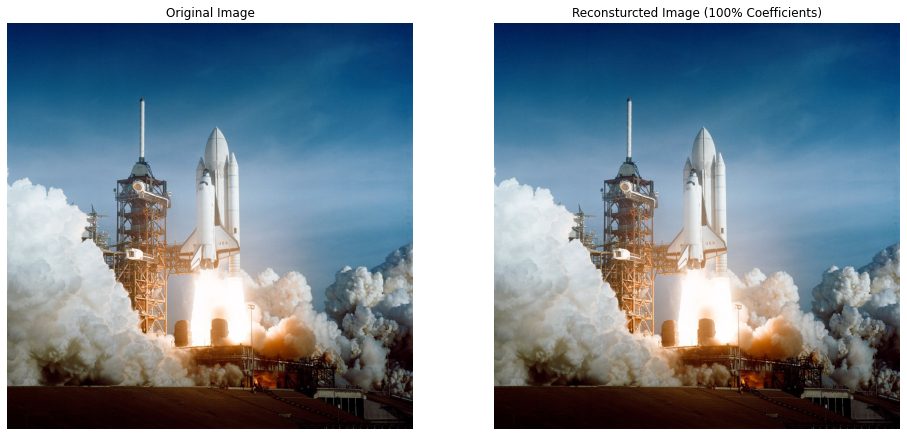

In [7]:
# plot original and reconstructed image (with no lost information)

fig, axs = plt.subplots(1, 2, figsize = (16,8))
axs[0].imshow(im)
axs[0].axis('off')
axs[0].set_title("Original Image")

axs[1].imshow(reconstructed)
axs[1].axis('off')
axs[1].set_title("Reconsturcted Image (100% Coefficients)")

plt.show()

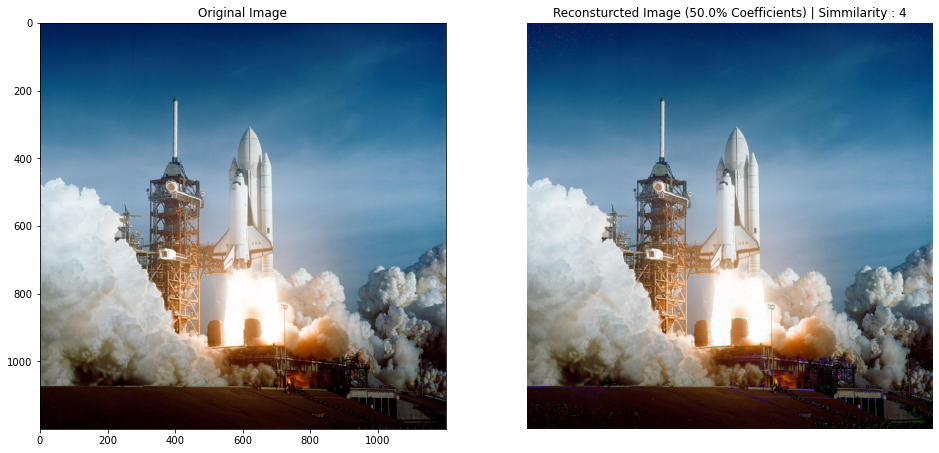

In [8]:
DCTrecreate(im, 0.5, display=True) # Reconstructing image with 50% loss in DCT Coefficients

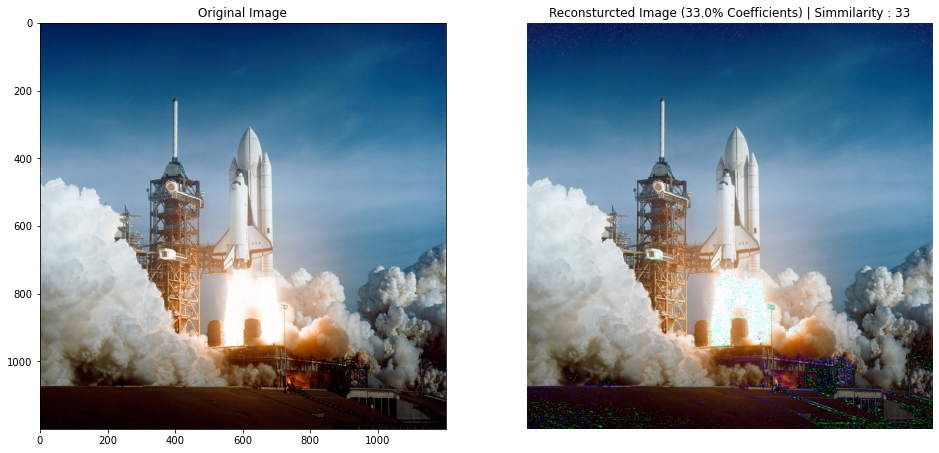

In [9]:
DCTrecreate(im, 0.33, display=True) # Reconstructing image with 50% loss in DCT Coefficients

In [10]:
thresholds = np.flip(np.array(list(range(1, 100))))

simmilarities = []

for i in thresholds:
    simmilarities.append((DCTrecreate(im, i/100, display=False))[1])


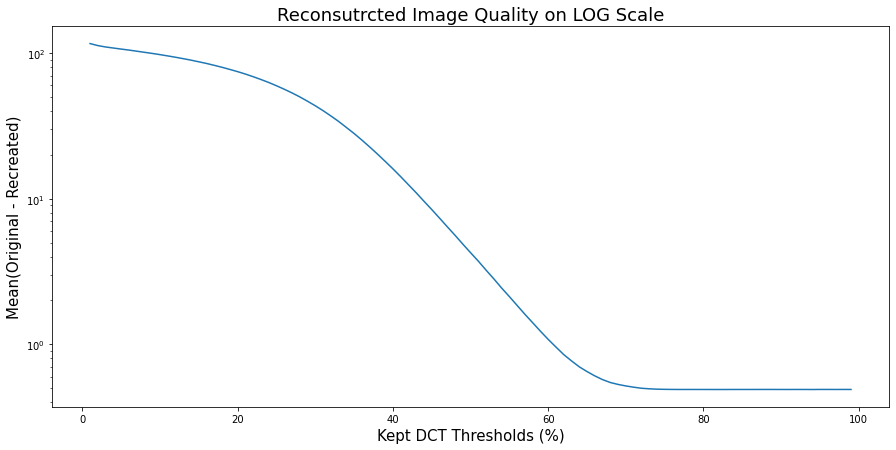

In [11]:
plt.figure(figsize=(15,7))
plt.plot(thresholds, simmilarities)
plt.xlabel("Kept DCT Thresholds (%)", size = 15)
plt.ylabel("Mean(Original - Recreated)", size = 15)
plt.title("Reconsutrcted Image Quality on LOG Scale", size = 18)
plt.yscale('log')